# Análise projetos discord

1. Baixa o html da página do discord [alura discord projetos](https://discord.com/channels/1228404913705451612/1228406162618060913)
2. Usa a API do gemini para avaliar cada um deles
3. Plota os 10 mais relevantes
4. Se tivesse mais tempo adicionaria mais itens relevantes ao projeto, como análise do github e dos códigos dos projetos .ipynb / python / whateaver

## Código ipynb

[analise_projetos.ipynb](analise_projetos.ipynb)

## Selenium

```bash
$ pip install -U -q selenium webdriver-manager beautifulsoup4 pandas google-generativeai ipywidgets google-cloud-aiplatform
```

- [chrome driver](https://chromedriver.chromium.org/downloads)
- [alura discord projetos](https://discord.com/channels/1228404913705451612/1228406162618060913)
- [aistudio google](https://aistudio.google.com/app/prompts/new_chat)
- [Google AI - example](https://ai.google.dev/gemini-api/docs/quickstart?hl=pt-br)


## Chrome driver

Adicionar ao path do Windows/Linux `C:\WebDriver\bin`



# Configurações

In [1]:
# preencher com informações válidas
username = "...email@email.com..." # email discord
password = "...SENHA DISCORD..."
url_alura = "https://discord.com/channels/1228404913705451612/1228406162618060913"
API_KEY_GOOGLE = "...API KEY..."

In [2]:
! pip install -U -q selenium webdriver-manager beautifulsoup4 pandas google-generativeai ipywidgets google-cloud-aiplatform

# Salvar html discord

o ideal seria criar um bot, porém como precisa de acesso, vai no webcrawling

Depende da versão do chrome driver - Selenium possui alguns problemas de configuração e de versão

No pior dos casos: copiar o html na mão e colar no arquivo `pagina.html`

In [ ]:


import time

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
driver = webdriver.Chrome(options)

# head to github login page
driver.get(url_alura)
time.sleep(30)


# find username/email field and send the username itself to the input field
driver.find_element(By.NAME, 'email').send_keys(username)

# find password input field and insert password as well
driver.find_element(By.NAME, 'password').send_keys(password)
time.sleep(10)
# click login button
driver.find_element(By.XPATH, '//*[@id="app-mount"]/div[2]/div[1]/div[1]/div/div/div/div/form/div[2]/div/div[1]/div[2]/button[2]').click()

time.sleep(10)

# wait the ready state to be complete
WebDriverWait(driver=driver, timeout=50).until(
    lambda x: x.execute_script("return document.readyState === 'complete'")
)
error_message = "Incorrect username or password."
# get the errors (if there are)
errors = driver.find_elements(By.CLASS_NAME, "flash-error")
# if we find that error message within errors, then login is failed
sucesso = False
if any(error_message in e.text for e in errors):
    sucesso = False
    print("[!] Login failed")
else:
    sucesso = True
    print("[+] Login su")

if (not sucesso): 
    driver.quit()
    exit -1

## ----------------
#driver.get(url_alura)

time.sleep(30)

print("Salvar html")


html_content = driver.page_source
# Salve o conteúdo HTML em um arquivo
with open("pagina.html", "w", encoding="utf-8") as file:
    file.write(html_content)


driver.quit()

# Parser HTML discord

class="messagesWrapper_add28b group-spacing-16"

In [8]:
import pandas as pd

arquivo = "pagina.html"

from bs4 import BeautifulSoup

with open(arquivo, 'r', encoding='utf-8') as f:
  html_doc = f.read()

soup = BeautifulSoup(html_doc, 'html.parser')

html_chat_text = soup.find('div', class_='messagesWrapper_add28b group-spacing-16')

# print(html_chat_text) 

soup = BeautifulSoup(str(html_chat_text), 'html.parser')

dados_projetos = []

for mensagem in soup.find_all('li', class_='messageListItem__050f9'):
  # Extrair informações do projeto
  nome_autor = mensagem.find('div', class_='embedFieldValue_f2dcec').find('span').text.strip()
  link_github = mensagem.find('a', class_='anchor_c8ddc0').get('href')
  descricao = mensagem.find_all('div', class_='embedFieldValue_f2dcec')[2].text.strip()
  
  # Extrair número de estrelas (se houver)
  estrelas_div = mensagem.find('div', class_='reactionCount__2c34d')
  estrelas = estrelas_div.text.strip() if estrelas_div else "0"

  # Adicionar as informações à lista de dados
  dados_projetos.append([nome_autor, link_github, descricao, estrelas])

# Criar dataframe a partir da lista de dados
df_projetos = pd.DataFrame(dados_projetos, columns=['Autor', 'GitHub', 'Descrição', 'Estrelas'])

# Imprimir o dataframe - 10 primeiros
df_projetos[:10]

,Autor,GitHub,Descrição,Estrelas
0,Cristiano Santos,https://github.com/SantosCristiano/Project-IA-...,Automação de Publicação de Posts no WordPress ...,1
1,Vitor Ribeiro da Silva,https://github.com/KingRotiv/Gemini_EncontreFi...,Objetivo: Vamos usar o contexto do chat e as t...,1
2,Benilde Conceição Narciso Bonfim,https://github.com/benildebonfim,VemComunicarSTP,1
3,Rodrigo Souza Pereira,https://github.com/rodrigospereira22/ProjetoEs...,Esse é um projeto para pesquisar a possibilida...,5
4,Kauã Felipe Alves,https://github.com/Kaua-Felipe/gemini-web-chatbot,"Desenvolvi um ChatBot chamado Wall-e, integran...",3
5,Katriel Felipe Reis Carvalho,https://github.com/KatrielCarvalho/PROJETO_ALU...,O projeto G.A.I.A(Gráficos Aparatir de Imagens...,2
6,Ana Ruth Laine,https://github.com/typeLaine/Projeto_ImersaoIA...,"""Reeducação Linguística para a Inclusão: Um Pr...",1
7,Rodrigo Santos,https://github.com/Rodrigo2488/Imersao_IA.git,Quiz Interdisciplinar Alimentado por IA: Uma j...,2
8,João Pedro Fusco,https://github.com/joaopfusco/bible-chatbot,O projeto se concentra na Bíblia Sagrada e per...,1
9,Guilherme Boschetti,https://github.com/guilherme-boschetti/Alura_I...,"Olá! Quer doar, mas não sabe onde? Informe seu...",2


# Análise Google Gemini

In [62]:
import google.generativeai as genai


genai.configure(api_key=API_KEY_GOOGLE)
model = genai.GenerativeModel('gemini-pro')

def avaliar_projeto(descricao):
    prompt = f"""
    Avalie a qualidade do projeto proposto, a relevância na sociedade, a clareza da explicação
    e a resolução do problema apresentado na descrição abaixo, fornecendo uma nota de 1 a 100 para 
    cada critério. 
    A saída deve um número, sem texto, sem caracteres com a média das notas de qualidade, relevância, 
    explicação e resolução somente. Remova todo o texto restante

    Descrição do projeto:
    ```
    {descricao}
    ```

    Formato da resposta:
    nota
    """
    response = model.generate_content(prompt)
    return response.text

df_projetos['Nota_AI'] = df_projetos['Descrição'].apply(avaliar_projeto)

def remover_nao_numeros(texto):
  return ''.join(c for c in str(texto) if c.isdigit() or c == '.')

# Aplicar a função à coluna 'Nota_AI'
df_projetos['Nota_AI'] = df_projetos['Nota_AI'].apply(remover_nao_numeros)

df_projetos[0:10] # 10 primeiros

,Autor,GitHub,Descrição,Estrelas,Nota_AI,Autor2
10,Taffarel,https://github.com/TaffarelPereira/AssistenteP...,Assistente de Pesquisa Científica,3,82,T
33,Beatriz Lira Martins,https://github.com/beatrizliramartins/imersao-...,Chatbot Educativo sobre temas sociais Informaç...,1,93,B.L.M
30,Leonardo Meneguetti,https://github.com/leonardomeneguetti/Projeto_...,Objetivo do projeto é usar a API da Google AI ...,1,60,L.M
7,Rodrigo Santos,https://github.com/Rodrigo2488/Imersao_IA.git,Quiz Interdisciplinar Alimentado por IA: Uma j...,2,77,R.S
18,Leandro Torquato,https://github.com/leandrotorquato/desafio_fin...,ChatBot - Assistente virtual,1,75,L.T
44,Fábio Meirelles,https://github.com/FabioMeirelles3/Projeto_Ime...,"Projeto desenvolvido com a API do Gemini, util...",2,75,F.M
38,Daniel Luan Lourenço,https://github.com/danluan/seuJOB-assistant,JOBinho é um assistente virtual inteligente cr...,0,80,D.L.L
29,Manuel Filipe Pedro,https://github.com/Manuel-Pedro/imersaoIA-alun...,Hodvats IA: Transformando Dados em Insights co...,2,75,M.F.P
4,Kauã Felipe Alves,https://github.com/Kaua-Felipe/gemini-web-chatbot,"Desenvolvi um ChatBot chamado Wall-e, integran...",3,75,K.F.A
17,João Batista Ferreira Junior,https://github.com/joaobatista235/Detectar-Pla...,Desenvolvido em python com integração com a AP...,2,75,J.B.F.J


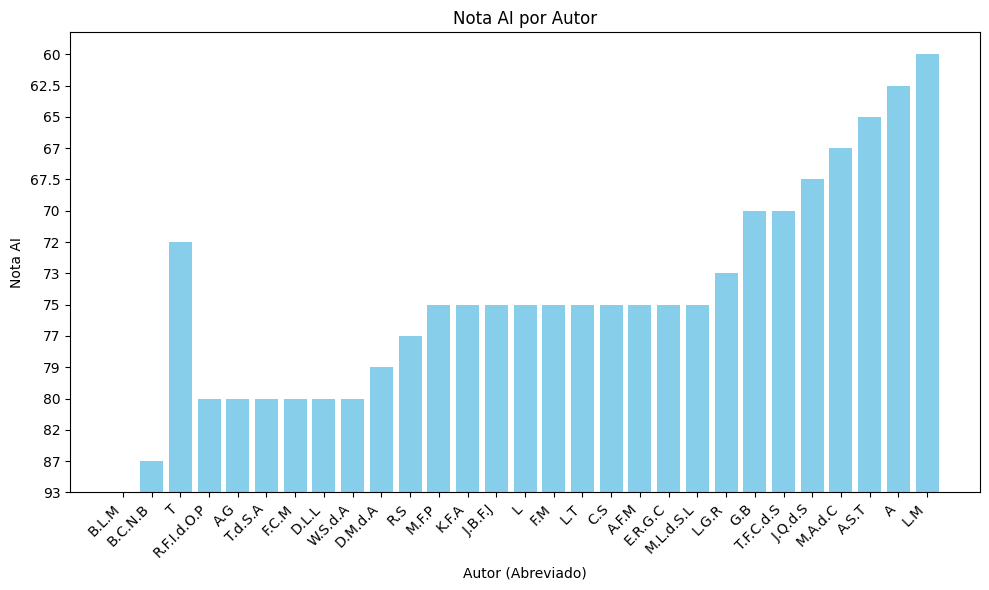

In [63]:
import matplotlib.pyplot as plt

# Ordenar o DataFrame pela coluna 'Nota_AI' em ordem decrescente
df_projetos = df_projetos.sort_values(by='Nota_AI', ascending=False)

# Selecionar as 30 primeiras linhas (ou menos se houver menos de 30 linhas)
df_top30 = df_projetos.head(30)

# Abreviar os nomes dos autores
df_top30['Autor2'] = df_top30['Autor'].apply(lambda nome: '.'.join([part[0] for part in nome.split()]))

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_top30['Autor2'], df_top30['Nota_AI'], color='skyblue')
plt.xlabel('Autor (Abreviado)')
plt.ylabel('Nota AI')
plt.title('Nota AI por Autor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
df_projetos[0:10].sort_values(by='Nota_AI', ascending=False)

,Autor,GitHub,Descrição,Estrelas,Nota_AI,Autor2
33,Beatriz Lira Martins,https://github.com/beatrizliramartins/imersao-...,Chatbot Educativo sobre temas sociais Informaç...,1,93,B.L.M
2,Benilde Conceição Narciso Bonfim,https://github.com/benildebonfim,VemComunicarSTP,1,87,B.C.N.B
10,Taffarel,https://github.com/TaffarelPereira/AssistenteP...,Assistente de Pesquisa Científica,3,82,T
43,Rafael Felipe Inácio de Oliveira Pinto,https://github.com/IndexErr0r/Gemini-Bot,"Um assistente virtual, acionado por comando de...",2,80,R.F.I.d.O.P
22,Alex Gonçalves,https://github.com/alexsilvagoncalves89/Projet...,Este projeto consiste em um chatbot simples. O...,1,80,A.G
12,Tatiany de Souza Albuquerque,https://github.com/tatianysouza/FitBot.git,FitBot é um chatbot de treinamento físico dese...,6,80,T.d.S.A
25,Fernanda Campos Magesty,https://github.com/FernandaMagesty/Projeto-Ime...,Quick Support: Seu Assistente Técnico 24 HORAS...,1,80,F.C.M
38,Daniel Luan Lourenço,https://github.com/danluan/seuJOB-assistant,JOBinho é um assistente virtual inteligente cr...,0,80,D.L.L
36,Weslley Souza de Alencar,https://github.com/synkodev/gemini-alura-chall...,O projeto utiliza o Gemini para gerar recomend...,2,80,W.S.d.A
32,Daniel Martins de Andrade,https://github.com/Danielmadr/chatbot-auxilio-rs,Chatbot de Auxílio ao RS. Este projeto é um ch...,2,79,D.M.d.A
